In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage plus lisible dans Jupyter
%matplotlib inline
sns.set(style="whitegrid")


In [2]:
#Chargement du fichier CSV
df = pd.read_csv(r'C:\Users\yugerthen\OneDrive\Desktop\Projet fin module\Dataset_Abandon_Scolaire.csv')


In [3]:
# Affichage des premières lignes
print("Aperçu du dataset :")
df.head()


Aperçu du dataset :


,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


In [9]:
# Informations générales sur les colonnes et types
print("Infos sur les données :")
df.info()


Infos sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   object 
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne         2000 non-null   float64
 5   Situation_familiale  2000 non-null   object 
 6   Abandon              2000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 109.5+ KB


In [11]:
# Statistiques pour les colonnes numériques
print("Statistiques descriptives :")
df.describe()


Statistiques descriptives :


,Age,Taux_presence,Nombre_retards,Note_moyenne,Abandon
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,20.5930,84.637016,2.593500,13.441019,0.084000
std,2.0133,7.921973,1.788255,1.809283,0.277457
min,14.0000,59.586369,0.000000,7.615012,0.000000
25%,19.0000,79.279829,1.000000,12.268147,0.000000
50%,21.0000,84.813868,3.000000,13.470242,0.000000
75%,22.0000,90.169016,4.000000,14.688037,0.000000
max,28.0000,100.000000,9.000000,18.833574,1.000000


In [12]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
df.isnull().sum()


Valeurs manquantes par colonne :


Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64

In [13]:
# Type de chaque colonne
print("Types de données :")
df.dtypes


Types de données :


Age                      int64
Sexe                    object
Taux_presence          float64
Nombre_retards           int64
Note_moyenne           float64
Situation_familiale     object
Abandon                  int64
dtype: object

In [15]:
# Suppression des lignes avec des valeurs manquantes (si peu nombreuses)
df = df.dropna()

# Vérification après traitement
df.isnull().sum()


Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64

In [20]:
# Nettoyage des noms de colonnes : suppression des espaces, passage en minuscules
df.columns = df.columns.str.strip().str.lower()

# Affichage des colonnes pour vérifier
print("Colonnes après nettoyage :", df.columns.tolist())

# Encodage de 'sexe' : 0 = Homme, 1 = Femme
if 'sexe' in df.columns:
    df['sexe'] = df['sexe'].map({'Homme': 0, 'Femme': 1})

# Encodage one-hot de 'situation_familiale' (si elle existe)
if 'situation_familiale' in df.columns:
    df = pd.get_dummies(df, columns=['situation_familiale'], drop_first=True)


Colonnes après nettoyage : ['age', 'sexe', 'taux_presence', 'nombre_retards', 'note_moyenne', 'abandon', 'situation_familiale_divorcé', 'situation_familiale_enfants à charge', 'situation_familiale_marié']


In [21]:
# Vérification que tout est bien encodé
df.head()


,age,sexe,taux_presence,nombre_retards,note_moyenne,abandon,situation_familiale_divorcé,situation_familiale_enfants à charge,situation_familiale_marié
0,21,NaN,89.585023,2,15.826896,0,False,True,False
1,20,NaN,70.713068,3,12.829358,0,False,False,False
2,22,NaN,82.122963,1,13.086319,0,False,True,False
3,24,NaN,87.408859,3,14.992032,0,False,False,False
4,20,NaN,86.470676,3,12.671649,0,False,False,True


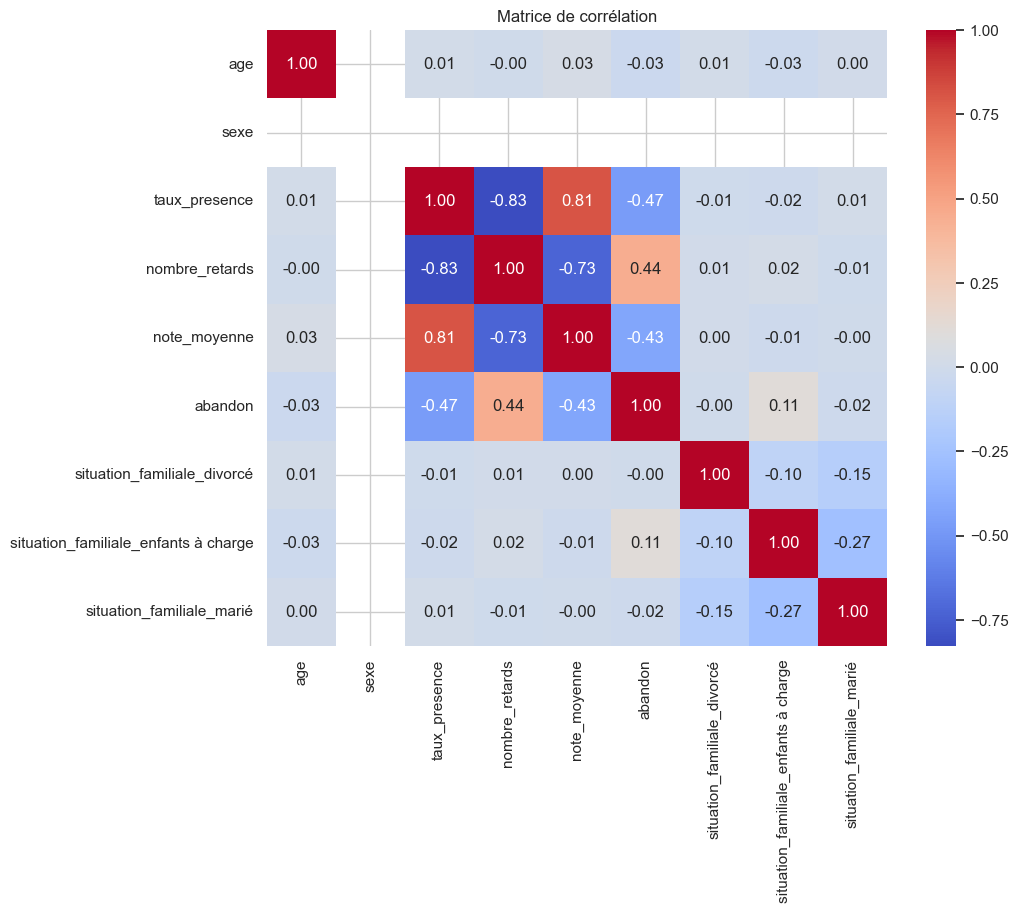

In [24]:
# Calcul de la corrélation entre les variables numériques
corr_matrix = df.corr(numeric_only=True)

# Affichage avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


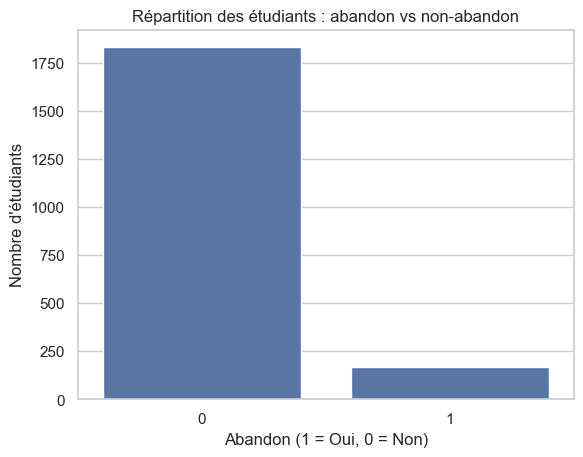

In [26]:
# Distribution de la variable cible (abandon)
sns.countplot(x='abandon', data=df)
plt.title("Répartition des étudiants : abandon vs non-abandon")
plt.xlabel("Abandon (1 = Oui, 0 = Non)")
plt.ylabel("Nombre d'étudiants")
plt.show()


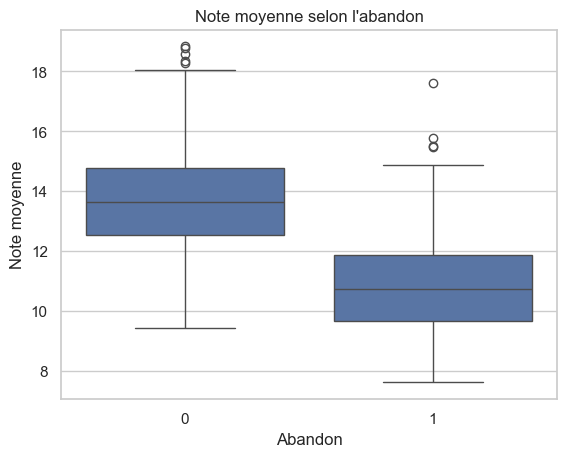

In [28]:
# Boxplot de la note moyenne selon l'abandon
sns.boxplot(x='abandon', y='note_moyenne', data=df)
plt.title("Note moyenne selon l'abandon")
plt.xlabel("Abandon")
plt.ylabel("Note moyenne")
plt.show()


In [35]:
import pandas as pd

# Chemin vers ton fichier CSV (modifie si besoin)
chemin_fichier = r'C:\Users\yugerthen\OneDrive\Desktop\Projet fin module\Dataset_Abandon_Scolaire.csv'

# Chargement des données
df_enc = pd.read_csv(chemin_fichier)

# Afficher les colonnes pour vérifier
print("Colonnes du dataframe :", df_enc.columns)

# Afficher les premières lignes
df_enc.head()


Colonnes du dataframe : Index(['Age', 'Sexe', 'Taux_presence', 'Nombre_retards', 'Note_moyenne',
       'Situation_familiale', 'Abandon'],
      dtype='object')


,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


In [41]:
# Afficher toutes les colonnes du dataframe
print("Colonnes du dataframe :")
print(df_enc.columns)

# Chercher les colonnes qui contiennent 'situation' dans leur nom (insensible à la casse)
colonnes_situation = [col for col in df_enc.columns if 'situation' in col.lower()]
print("\nColonnes contenant 'situation' :", colonnes_situation)

# Si on trouve au moins une colonne avec 'situation', afficher ses valeurs uniques
if colonnes_situation:
    col_cat = colonnes_situation[0]  # Prendre la première trouvée
    print(f"\nValeurs uniques dans la colonne '{col_cat}':")
    print(df_enc[col_cat].unique())
else:
    print("Aucune colonne contenant 'situation' trouvée dans le dataframe.")


Colonnes du dataframe :
Index(['Age', 'Sexe', 'Taux_presence', 'Nombre_retards', 'Note_moyenne',
       'Abandon', 'situation_familiale_enc'],
      dtype='object')

Colonnes contenant 'situation' : ['situation_familiale_enc']

Valeurs uniques dans la colonne 'situation_familiale_enc':
[2 0 3 1]


In [43]:
# Séparation des variables explicatives (X) et de la cible (y)
X = df_enc.drop('Abandon', axis=1)  # toutes les colonnes sauf la cible
y = df_enc['Abandon']

# Afficher les premières lignes pour vérifier
print(X.head())
print(y.value_counts())


   Age   Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
0   21  Femme      89.585023               2     15.826896   
1   20  Homme      70.713068               3     12.829358   
2   22  Femme      82.122963               1     13.086319   
3   24  Homme      87.408859               3     14.992032   
4   20  Homme      86.470676               3     12.671649   

   situation_familiale_enc  
0                        2  
1                        0  
2                        2  
3                        0  
4                        3  
Abandon
0    1832
1     168
Name: count, dtype: int64


In [47]:
# Partir du DataFrame original df_enc
X = df_enc.drop('Abandon', axis=1)
y = df_enc['Abandon']

from sklearn.preprocessing import LabelEncoder

# Encoder 'Sexe'
le_sexe = LabelEncoder()
X['Sexe_enc'] = le_sexe.fit_transform(X['Sexe'])

# Supprimer la colonne 'Sexe' originale
X = X.drop('Sexe', axis=1)

print(X.head())


   Age  Taux_presence  Nombre_retards  Note_moyenne  situation_familiale_enc  \
0   21      89.585023               2     15.826896                        2   
1   20      70.713068               3     12.829358                        0   
2   22      82.122963               1     13.086319                        2   
3   24      87.408859               3     14.992032                        0   
4   20      86.470676               3     12.671649                        3   

   Sexe_enc  
0         0  
1         1  
2         0  
3         1  
4         1  


In [49]:
from sklearn.model_selection import train_test_split

X = df_enc.drop('Abandon', axis=1)
y = df_enc['Abandon']

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Taille train: {X_train.shape}, Taille test: {X_test.shape}")


Taille train: (1600, 6), Taille test: (400, 6)


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Colonnes numériques à standardiser
colonnes_num = ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']

X_train.loc[:, colonnes_num] = scaler.fit_transform(X_train[colonnes_num])
X_test.loc[:, colonnes_num] = scaler.transform(X_test[colonnes_num])

print(X_train.head())


           Age   Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
920   1.195415  Femme       1.954174       -1.470935      1.167525   
657  -0.292654  Femme      -0.520866       -0.340805      0.280116   
34    0.699392  Homme      -1.682639        1.919455     -1.258259   
1561 -0.788677  Homme      -0.280497       -0.905870     -0.518484   
1433 -0.788677  Homme       0.057512       -0.340805      0.501825   

      situation_familiale_enc  
920                         0  
657                         2  
34                          0  
1561                        0  
1433                        3  


In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Chargement du fichier
chemin_fichier = r'C:\Users\yugerthen\OneDrive\Desktop\Projet fin module\Dataset_Abandon_Scolaire.csv'
df_enc = pd.read_csv(chemin_fichier)

print("Colonnes du dataframe :", df_enc.columns)

# Encoder la colonne Situation_familiale (avec la bonne casse)
if 'Situation_familiale' in df_enc.columns:
    le_situation = LabelEncoder()
    df_enc['situation_familiale_enc'] = le_situation.fit_transform(df_enc['Situation_familiale'])
else:
    print("Colonne 'Situation_familiale' non trouvée dans le dataset.")

# Encoder la colonne Sexe
if 'Sexe' in df_enc.columns:
    le_sexe = LabelEncoder()
    df_enc['Sexe_enc'] = le_sexe.fit_transform(df_enc['Sexe'])
else:
    print("Colonne 'Sexe' non trouvée dans le dataset.")

# Colonnes à garder pour les features
colonnes_features = ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne', 'situation_familiale_enc', 'Sexe_enc']

# Vérifier que toutes les colonnes existent
for col in colonnes_features:
    if col not in df_enc.columns:
        print(f"Attention, la colonne '{col}' n'existe pas dans le dataframe.")

# Création des jeux de données X et y
X = df_enc[colonnes_features]
y = df_enc['Abandon']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Taille train: {X_train.shape}, Taille test: {X_test.shape}")


Colonnes du dataframe : Index(['Age', 'Sexe', 'Taux_presence', 'Nombre_retards', 'Note_moyenne',
       'Situation_familiale', 'Abandon'],
      dtype='object')
Taille train: (1600, 6), Taille test: (400, 6)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialiser le modèle de régression logistique
model = LogisticRegression(random_state=42, max_iter=1000)

# Entraîner le modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.9475

Matrice de confusion:
 [[367   3]
 [ 18  12]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       370
           1       0.80      0.40      0.53        30

    accuracy                           0.95       400
   macro avg       0.88      0.70      0.75       400
weighted avg       0.94      0.95      0.94       400



In [60]:
# 1. Importer SMOTE pour rééquilibrer les classes
from imblearn.over_sampling import SMOTE

# 2. Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Taille avant SMOTE :", X_train.shape)
print("Taille après SMOTE :", X_train_res.shape)

# 3. Réentraîner le modèle Logistic Regression avec les données rééquilibrées
model_resampled = LogisticRegression(random_state=42, max_iter=1000)
model_resampled.fit(X_train_res, y_train_res)

# 4. Faire des prédictions sur le set test
y_pred_resampled = model_resampled.predict(X_test)

# 5. Évaluer le modèle réentraîné
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy après SMOTE :", accuracy_score(y_test, y_pred_resampled))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_resampled))
print("Rapport de classification :\n", classification_report(y_test, y_pred_resampled))


Taille avant SMOTE : (1600, 6)
Taille après SMOTE : (2924, 6)
Accuracy après SMOTE : 0.91
Matrice de confusion :
 [[338  32]
 [  4  26]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       370
           1       0.45      0.87      0.59        30

    accuracy                           0.91       400
   macro avg       0.72      0.89      0.77       400
weighted avg       0.95      0.91      0.92       400



In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Appliquer la PCA après normalisation
pca = PCA(n_components=4)  # Tu peux ajuster le nombre de composantes
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Rééquilibrage avec SMOTE sur les données PCA
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_pca, y_train)

print("Taille avant SMOTE :", X_train_pca.shape)
print("Taille après SMOTE :", X_train_res.shape)

# 4. Réentraîner le modèle Logistic Regression avec les données PCA + SMOTE
model_resampled = LogisticRegression(random_state=42, max_iter=1000)
model_resampled.fit(X_train_res, y_train_res)

# 5. Faire des prédictions sur le test set transformé par PCA
y_pred_resampled = model_resampled.predict(X_test_pca)

# 6. Évaluation
print("Accuracy après PCA + SMOTE :", accuracy_score(y_test, y_pred_resampled))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_resampled))
print("Rapport de classification :\n", classification_report(y_test, y_pred_resampled))


Taille avant SMOTE : (1600, 4)
Taille après SMOTE : (2924, 4)
Accuracy après PCA + SMOTE : 0.89
Matrice de confusion :
 [[328  42]
 [  2  28]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       370
           1       0.40      0.93      0.56        30

    accuracy                           0.89       400
   macro avg       0.70      0.91      0.75       400
weighted avg       0.95      0.89      0.91       400



In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# GridSearch avec validation croisée
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train_res, y_train_res)

# Meilleur modèle
best_knn = grid_knn.best_estimator_

# Prédictions
y_pred_knn = best_knn.predict(X_test_pca)

# Évaluation
print("Meilleur k :", grid_knn.best_params_)
print("Accuracy KNN :", accuracy_score(y_test, y_pred_knn))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))
print("Rapport de classification :\n", classification_report(y_test, y_pred_knn))


Meilleur k : {'n_neighbors': 3}
Accuracy KNN : 0.9025
Matrice de confusion :
 [[339  31]
 [  8  22]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       370
           1       0.42      0.73      0.53        30

    accuracy                           0.90       400
   macro avg       0.70      0.82      0.74       400
weighted avg       0.93      0.90      0.91       400



In [65]:
from sklearn.tree import DecisionTreeClassifier

# Grille d'hyperparamètres pour l'arbre
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='f1')
grid_tree.fit(X_train_res, y_train_res)

# Meilleur modèle
best_tree = grid_tree.best_estimator_

# Prédictions
y_pred_tree = best_tree.predict(X_test_pca)

# Évaluation
print("Meilleurs paramètres Arbre :", grid_tree.best_params_)
print("Accuracy Arbre :", accuracy_score(y_test, y_pred_tree))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_tree))
print("Rapport de classification :\n", classification_report(y_test, y_pred_tree))


Meilleurs paramètres Arbre : {'max_depth': None, 'min_samples_split': 2}
Accuracy Arbre : 0.9
Matrice de confusion :
 [[342  28]
 [ 12  18]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       370
           1       0.39      0.60      0.47        30

    accuracy                           0.90       400
   macro avg       0.68      0.76      0.71       400
weighted avg       0.92      0.90      0.91       400



In [67]:
# Optionnel : Comparaison dans un tableau
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, y_pred_resampled),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_tree)
]

for model, acc in zip(models, accuracies):
    print(f"{model} - Accuracy : {acc:.4f}")


Logistic Regression - Accuracy : 0.8900
KNN - Accuracy : 0.9025
Decision Tree - Accuracy : 0.9000


In [71]:
def mean_cosine_similarity(y_true, y_pred):
    y_true_np = np.array(y_true).reshape(-1, 1)
    y_pred_np = np.array(y_pred).reshape(-1, 1)
    sim = cosine_similarity(y_true_np.T, y_pred_np.T)
    return sim[0][0]


In [73]:
cos_sim = mean_cosine_similarity(y_test, y_pred_resampled)
print("Cosine similarity :", cos_sim)


Cosine similarity : 0.6110100926607787


In [75]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # régularisation
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

# GridSearch sur Logistic Regression
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)  # X_train_res = PCA + SMOTE

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score cv :", grid_search.best_score_)


Meilleurs paramètres : {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Meilleur score cv : 0.8710631073644773


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fonction similarité cosinus (à avoir dans ton notebook)
def mean_cosine_similarity(y_true, y_pred):
    y_true_np = np.array(y_true).reshape(-1, 1)
    y_pred_np = np.array(y_pred).reshape(-1, 1)
    sim = cosine_similarity(y_true_np.T, y_pred_np.T)
    return sim[0][0]

# 1. Préprocessing (normalisation + PCA + SMOTE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_pca, y_train)

# 2. GridSearch Logistic Regression
params_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs'], 'max_iter': [1000]}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), params_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_res, y_train_res)

# 3. GridSearch KNN
params_knn = {'n_neighbors': [3,5,7,9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_res, y_train_res)

# 4. GridSearch Decision Tree
params_tree = {'max_depth': [3,5,7, None], 'min_samples_split': [2,5,10]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), params_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train_res, y_train_res)

# 5. Récupérer les meilleurs modèles
best_estimators = {
    'Logistic Regression': grid_lr.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'Decision Tree': grid_tree.best_estimator_
}

# 6. Évaluation des modèles sur le test set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_pca)
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
    print("Rapport de classification :\n", classification_report(y_test, y_pred))
    cos_sim = mean_cosine_similarity(y_test, y_pred)
    print("Cosine similarity :", cos_sim)
    print()


--- Logistic Regression ---
Accuracy : 0.8925
Matrice de confusion :
 [[329  41]
 [  2  28]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       370
           1       0.41      0.93      0.57        30

    accuracy                           0.89       400
   macro avg       0.70      0.91      0.75       400
weighted avg       0.95      0.89      0.91       400

Cosine similarity : 0.6154217751694011

--- KNN ---
Accuracy : 0.9075
Matrice de confusion :
 [[343  27]
 [ 10  20]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       370
           1       0.43      0.67      0.52        30

    accuracy                           0.91       400
   macro avg       0.70      0.80      0.73       400
weighted avg       0.93      0.91      0.92       400

Cosine similarity : 0.5326236412913075

--- Decision Tree ---
Accuracy : 0.9
M

In [82]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Définir le modèle de base
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Grille d'hyperparamètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search_cv.fit(X_train_res, y_train_res)

print("Meilleurs paramètres (GridSearch CV) :", grid_search_cv.best_params_)
print("Meilleur score F1 en CV :", grid_search_cv.best_score_)


Meilleurs paramètres (GridSearch CV) : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Meilleur score F1 en CV : 0.873649400957607


In [84]:
best_logreg = grid_search_cv.best_estimator_
y_pred_cv = best_logreg.predict(X_test_pca)

print("Accuracy :", accuracy_score(y_test, y_pred_cv))
print("Rapport classification :\n", classification_report(y_test, y_pred_cv))


Accuracy : 0.89
Rapport classification :
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       370
           1       0.40      0.93      0.56        30

    accuracy                           0.89       400
   macro avg       0.70      0.91      0.75       400
weighted avg       0.95      0.89      0.91       400



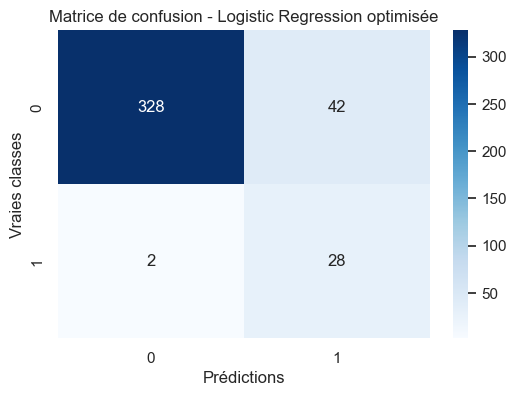

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_cv)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Logistic Regression optimisée")
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.show()


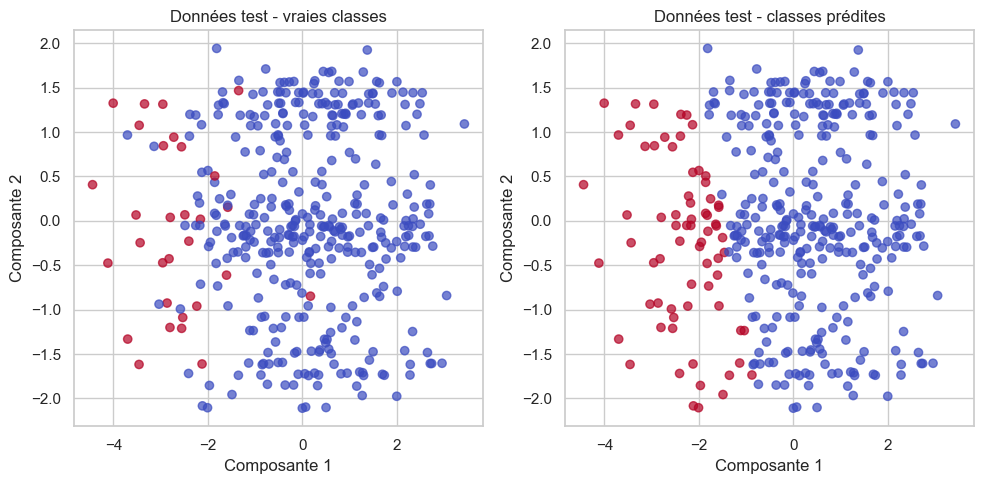

In [88]:
# On réduit PCA à 2 composantes pour visualisation simple
pca_2d = PCA(n_components=2)
X_test_pca_2d = pca_2d.fit_transform(X_test_scaled)

plt.figure(figsize=(10,5))

# Vraies classes
plt.subplot(1,2,1)
plt.scatter(X_test_pca_2d[:,0], X_test_pca_2d[:,1], c=y_test, cmap='coolwarm', alpha=0.7)
plt.title("Données test - vraies classes")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

# Classes prédites
plt.subplot(1,2,2)
plt.scatter(X_test_pca_2d[:,0], X_test_pca_2d[:,1], c=y_pred_cv, cmap='coolwarm', alpha=0.7)
plt.title("Données test - classes prédites")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

plt.tight_layout()
plt.show()


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Entraîner Random Forest sur les données SMOTE + PCA
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Prédictions
y_pred_rf = rf.predict(X_test_pca)
y_proba_rf = rf.predict_proba(X_test_pca)[:, 1]

print("Random Forest - Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Rapport classification :\n", classification_report(y_test, y_pred_rf))


Random Forest - Accuracy : 0.93
Random Forest - Rapport classification :
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       370
           1       0.52      0.77      0.62        30

    accuracy                           0.93       400
   macro avg       0.75      0.85      0.79       400
weighted avg       0.95      0.93      0.94       400



Random Forest - Accuracy : 0.9275
Matrice de confusion :
 [[348  22]
 [  7  23]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       370
           1       0.51      0.77      0.61        30

    accuracy                           0.93       400
   macro avg       0.75      0.85      0.79       400
weighted avg       0.95      0.93      0.93       400



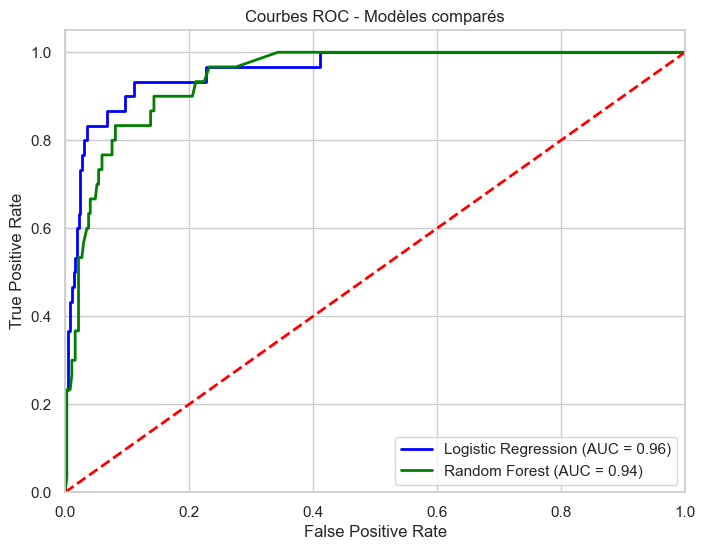

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Définir le modèle Random Forest
rf = RandomForestClassifier(random_state=42)

# 2. Définir la grille des hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. GridSearch avec validation croisée
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_res, y_train_res)  # Attention : X_train_res = PCA + SMOTE déjà faits

# 4. Meilleur modèle RF
best_rf = grid_search_rf.best_estimator_

# 5. Prédictions et probabilités sur le test set
y_pred_rf = best_rf.predict(X_test_pca)
y_proba_rf = best_rf.predict_proba(X_test_pca)[:, 1]

# 6. Calcul et affichage des métriques du RF
print("Random Forest - Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf))

# 7. Probabilités pour la régression logistique (déjà optimisée)
y_proba_logreg = best_logreg.predict_proba(X_test_pca)[:, 1]

# 8. Calcul des courbes ROC et AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 9. Tracé des courbes ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC - Modèles comparés')
plt.legend(loc='lower right')
plt.show()
